<a href="https://colab.research.google.com/github/Aniketh78/ML_Models/blob/main/experiment_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

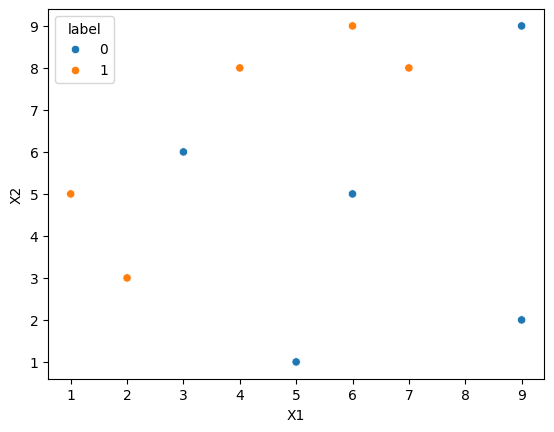

In [ ]:
df = pd.DataFrame()
df['X1'] = [1, 2, 3, 4, 5, 6, 6, 7, 9, 9]
df['X2'] = [5, 3, 6, 8, 1, 9, 5, 8, 9, 2]
df['label'] = [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]
sns.scatterplot(x=df['X1'], y=df['X2'], hue=df['label'])
df['weights'] = 1 / df.shape[0]

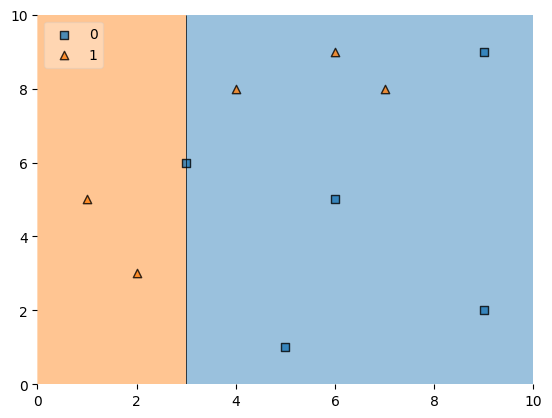

In [ ]:
dt1 = DecisionTreeClassifier(max_depth=1)
x = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values
dt1.fit(x, y)
plot_decision_regions(x, y, clf=dt1, legend=2)
df['y_pred'] = dt1.predict(x)


In [ ]:

def calculate_model_weight(error):
    return 0.5 * np.log((1 - error) / error)

In [ ]:
alpha1 = calculate_model_weight(0.3)

In [ ]:
def update_row_weights(row, alpha=0.423):
    return row['weights'] * np.exp(-alpha) if row['label'] == row['y_pred'] else row['weights'] * np.exp(alpha)

df['updated_weights'] = df.apply(update_row_weights, axis=1)
df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [ ]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a > row['cumsum_lower']:
                indices.append(index)
    return indices

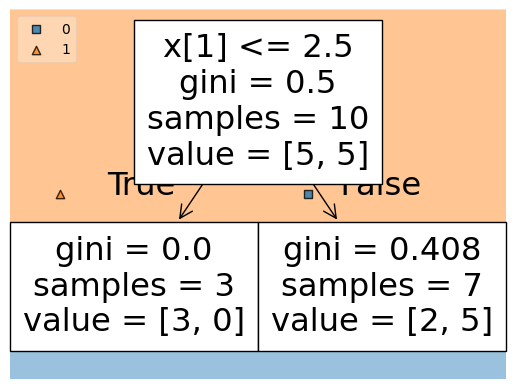

In [ ]:
index_values = create_new_dataset(df)
second_df = df.iloc[index_values, [0, 1, 2, 3]]
dt2 = DecisionTreeClassifier(max_depth=1)
x = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values
dt2.fit(x, y)
plot_tree(dt2)
plot_decision_regions(x, y, clf=dt2, legend=2)
second_df['y_pred'] = dt2.predict(x)
alpha2 = calculate_model_weight(0.1)

In [ ]:
def update_row_weights(row, alpha=1.09):
    return row['weights'] * np.exp(-alpha) if row['label'] == row['y_pred'] else row['weights'] * np.exp(alpha)

second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)
second_df['normalized_weights'] = second_df['updated_weights'] / second_df['updated_weights'].sum()
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']
alpha3 = calculate_model_weight(0.7)

query = np.array([1, 5]).reshape(1, 2)
print(dt1.predict(query))
print(dt2.predict(query))

print(alpha1 * 1 + alpha2 * 1 + alpha3 * 1)
print(np.sign(1.09))

query = np.array([9, 9]).reshape(1, 2)
print(dt1.predict(query))
print(dt2.predict(query))
print(alpha1 * 1 + alpha2 * (-1) + alpha3 * (-1))
print(np.sign(-0.25))

print(alpha1, alpha2, alpha3)

[1]
[1]
1.09861228866811
1.0
[0]
[1]
-0.2513144282809062
-1.0
0.42364893019360184 1.0986122886681098 -0.4236489301936017
